## UE19CS332 - AIWR Project
## Content Based Search Engine for E-Books
## Team - Tired Of Searching
## Members : 

> ### Moulya T - PES1UG19CS279
> ### Parimala S - PES1UG19CS323
> ### Shweta Patki - PES1UG19CS477






## Concepts Used


1.   Index Construction
2.   Query Processing
3.   Latent Semantic Indexing
4.   Text Clustering
5.   LINGO Algorithm
6.   Cluster labeling based on Cluster content discovery
7.   Ranked Retrieval
4.   Content based search







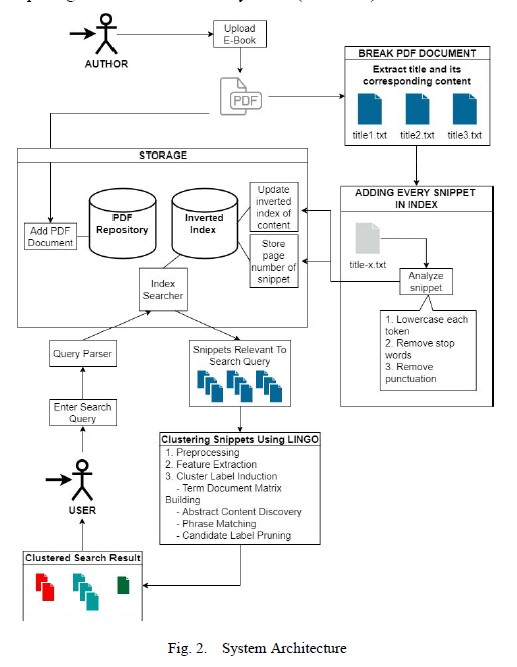

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
data = pd.read_csv(r'lingo.csv')
data.head()

,Book_id,Book_title,Author,Snippet_id,Snippet_title,Content
0,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",1,Boolean Retrieval,The meaning of the term information retrieval ...
1,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",2,Distributed Indexing,Collections are often so large that we cannot ...
2,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",3,Dynamic Indexing,"Thus far, we have assumed that the document co..."
3,2,Recommender Systems,Charu C. Aggarwal,1,Singular value decomposition,Singular value decomposition (SVD) is a form o...
4,2,Recommender Systems,Charu C. Aggarwal,2,Clustering and Neighbourhood - based methods,The main idea of clustering-based methods is t...


Some Stats

In [ ]:
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))
mwl = data['Content'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
print('There are {} words in every content snippet on an average.'.format(np.mean(mwl)))

There are 6 rows and 6 columns in train
There are 5.2643175924841215 words in every content snippet on an average.


Data , Data, More Data

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
stopword=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(text):
    if type(text) == np.float:
        return ""
    temp = text
    temp = re.sub("'", "", temp) #to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub("&[A-Za-z0-9_]+","", temp)
    temp = re.sub('[0-9]+','',temp)
    temp = re.sub("[<.*?>=:;]-","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?{}^%/@$&|,]', ' ', temp)
    temp = re.sub('\[.*?\]','', temp)
    temp=re.sub('\s+',' ',temp)
    
    if temp.endswith(' '): temp = temp[:-1]
    if temp.startswith(' '): temp = temp[1:]
    temp = temp.split()
    temp = [w for w in temp if not w in stopword]
    temp = " ".join(word for word in temp)
    return temp

In [ ]:
results = [clean_text(tw) for tw in data['Content']]
data['clean_text']=results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
data['casefolded_text'] = data['clean_text'].apply(lambda x: x.casefold())
data['tokens'] = data['casefolded_text'].apply(lambda x: word_tokenize(x))
data['lemmatized_tokens'] = data['tokens'].apply(lambda x: [wordnet_lemmatizer.lemmatize(item) for item in x])

In [ ]:
data.head()

,Book_id,Book_title,Author,Snippet_id,Snippet_title,Content,clean_text,casefolded_text,tokens,lemmatized_tokens
0,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",1,Boolean Retrieval,The meaning of the term information retrieval ...,The meaning term information retrieval broad. ...,the meaning term information retrieval broad. ...,"[the, meaning, term, information, retrieval, b...","[the, meaning, term, information, retrieval, b..."
1,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",2,Distributed Indexing,Collections are often so large that we cannot ...,Collections often large cannot perform index c...,collections often large cannot perform index c...,"[collections, often, large, can, not, perform,...","[collection, often, large, can, not, perform, ..."
2,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",3,Dynamic Indexing,"Thus far, we have assumed that the document co...",Thus far assumed document collection static. T...,thus far assumed document collection static. t...,"[thus, far, assumed, document, collection, sta...","[thus, far, assumed, document, collection, sta..."
3,2,Recommender Systems,Charu C. Aggarwal,1,Singular value decomposition,Singular value decomposition (SVD) is a form o...,Singular value decomposition SVD form matrix f...,singular value decomposition svd form matrix f...,"[singular, value, decomposition, svd, form, ma...","[singular, value, decomposition, svd, form, ma..."
4,2,Recommender Systems,Charu C. Aggarwal,2,Clustering and Neighbourhood - based methods,The main idea of clustering-based methods is t...,The main idea clustering-based methods replace...,the main idea clustering-based methods replace...,"[the, main, idea, clustering-based, methods, r...","[the, main, idea, clustering-based, method, re..."


Building Corpus

In [ ]:
def create_corpus(num):
    corpus=[]
    
    for x in data[0:num]['lemmatized_tokens']:
        for i in x:
            if i not in corpus:
                corpus.append(i)
    return corpus

corpus = create_corpus(6)
print(corpus)

['the', 'meaning', 'term', 'information', 'retrieval', 'broad', '.', 'just', 'getting', 'credit', 'card', 'wallet', 'type', 'number', 'form', 'however', 'academic', 'field', 'study', 'might', 'defined', 'thus', ':', 'ir', 'finding', 'material', 'usually', 'document', 'unstructured', 'nature', 'text', 'satisfies', 'need', 'within', 'large', 'collection', 'stored', 'computer', 'also', 'cover', 'kind', 'data', 'problem', 'beyond', 'specified', 'core', 'definition', 'above', '``', 'refers', 'clear', 'semantically', 'overt', 'easy-for-a-computer', 'structure', 'it', 'opposite', 'structured', 'canonical', 'example', 'relational', 'database', 'sort', 'company', 'use', 'maintain', 'product', 'inventory', 'personnel', 'record', 'in', 'reality', 'almost', 'truly', 'this', 'definitely', 'true', 'count', 'latent', 'linguistic', 'human', 'language', 'but', 'even', 'accepting', 'intended', 'notion', 'heading', 'paragraph', 'footnote', 'commonly', 'represented', 'explicit', 'markup', 'coding', 'under

Inverted Index Time !!!

In [ ]:
def print_inverted_index(dict):
    for key, value in dict.items():
        print(key," --> ", value)
        print()
        
def create_inverted_index(term_list,dict):    
    length = len(data['lemmatized_tokens'])
    for i in range(length):
        check = data['lemmatized_tokens'][i]
        for term in term_list:

            if term in check:
                if term not in dict:
                    dict[term] = []

                if term in dict:
                    dict[term].append(i)

    print_inverted_index(dict) 

snip_dict = {}
create_inverted_index(corpus,snip_dict)

the  -->  [0, 1, 2, 4, 5]

meaning  -->  [0]

term  -->  [0, 1, 2]

information  -->  [0, 5]

retrieval  -->  [0]

broad  -->  [0]

.  -->  [0, 1, 2, 3, 4, 5]

just  -->  [0, 4]

getting  -->  [0]

credit  -->  [0]

card  -->  [0]

wallet  -->  [0]

type  -->  [0]

number  -->  [0, 1, 2, 4, 5]

form  -->  [0, 3]

however  -->  [0, 3, 5]

academic  -->  [0]

field  -->  [0]

study  -->  [0]

might  -->  [0, 5]

defined  -->  [0]

thus  -->  [0, 2]

:  -->  [0, 1, 2]

ir  -->  [0]

finding  -->  [0]

material  -->  [0]

usually  -->  [0, 5]

document  -->  [0, 1, 2, 5]

unstructured  -->  [0]

nature  -->  [0]

text  -->  [0]

satisfies  -->  [0]

need  -->  [0, 1, 2, 4]

within  -->  [0, 4]

large  -->  [0, 1, 2, 4]

collection  -->  [0, 1, 2]

stored  -->  [0, 2]

computer  -->  [0, 1]

also  -->  [0]

cover  -->  [0]

kind  -->  [0]

data  -->  [0, 1, 4]

problem  -->  [0, 1]

beyond  -->  [0]

specified  -->  [0, 3]

core  -->  [0]

definition  -->  [0]

above  -->  [0]

``  -->  [0]

In [ ]:
inv_ind_df = pd.DataFrame(snip_dict.items(),columns=['word','documents'])
inv_ind_df.head()

,word,documents
0,the,"[0, 1, 2, 4, 5]"
1,meaning,[0]
2,term,"[0, 1, 2]"
3,information,"[0, 5]"
4,retrieval,[0]


Lets process queries now!!! ;)

In [ ]:
ans=set()

b_docs=list(inv_ind_df['documents'][inv_ind_df.index[inv_ind_df['word']=='index']])
a_docs=list(inv_ind_df['documents'][inv_ind_df.index[inv_ind_df['word']=='construction']])

ans=[i for i in b_docs if i in a_docs or b_docs]

for i in ans:
  print(data['Content'][i])

1    Collections are often so large that we cannot ...
2    Thus far, we have assumed that the document co...
5    The Gini index is one of the most commonly use...
Name: Content, dtype: object


Need to put the retrieved content snippets in a formatted way into another dataframe with other necessary columns and proceed to next steps.

In [ ]:
#lingo csv where index = retrieved ids

retrieved_df = data.iloc[i]
retrieved_df.head()
retrieved_df.to_csv('retrieved.csv')

Now this dataframe forms the basis for further clustering, labeling and ranking to be done.

In [ ]:
retrieved_df.head()

,Book_id,Book_title,Author,Snippet_id,Snippet_title,Content,clean_text,casefolded_text,tokens,lemmatized_tokens
1,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",2,Distributed Indexing,Collections are often so large that we cannot ...,Collections often large cannot perform index c...,collections often large cannot perform index c...,"[collections, often, large, can, not, perform,...","[collection, often, large, can, not, perform, ..."
2,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",3,Dynamic Indexing,"Thus far, we have assumed that the document co...",Thus far assumed document collection static. T...,thus far assumed document collection static. t...,"[thus, far, assumed, document, collection, sta...","[thus, far, assumed, document, collection, sta..."
5,2,Recommender Systems,Charu C. Aggarwal,3,Gini Index and Entropy,The Gini index is one of the most commonly use...,The Gini index one commonly used measures feat...,the gini index one commonly used measures feat...,"[the, gini, index, one, commonly, used, measur...","[the, gini, index, one, commonly, used, measur..."


Just a bit of preprocessing

In [ ]:
for i in range(len(retrieved_df['lemmatized_tokens'])):
  temp = [w for w in retrieved_df['lemmatized_tokens'].iloc[i] if not w in stopword and w != '.']
  retrieved_df['lemmatized_tokens'].iloc[i] = temp
  #print(temp)
retrieved_df['lemmatized_tokens']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1    [collection, often, large, perform, index, con...
2    [thus, far, assumed, document, collection, sta...
5    [gini, index, one, commonly, used, measure, fe...
Name: lemmatized_tokens, dtype: object

## Feature Extraction From Each of the Snippets

In [ ]:
!pip install keybert
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')
list1=[]
list2=[]
list3=[]
for i in retrieved_df['Content']:
  keywords = kw_model.extract_keywords(i, keyphrase_ngram_range=(1, 1), stop_words='english', 
                                      highlight=False, top_n=5)

  l1= list(dict(keywords).keys())
  list1.append(l1)
  keywords = kw_model.extract_keywords(i, keyphrase_ngram_range=(2, 2), stop_words='english', 
                                      highlight=False, top_n=3)

  l2= list(dict(keywords).keys())
  list2.append(l2)
  keywords = kw_model.extract_keywords(i, keyphrase_ngram_range=(3, 3), stop_words='english', 
                                      highlight=False, top_n=4)

  l3= list(dict(keywords).keys())
  list3.append(l3)
  
retrieved_df['L1Keys'] = list1
retrieved_df['L2Keys'] = list2
retrieved_df['L3Keys'] = list3
print(list1)
print(list2)
print(list3)

[['mapreduce', 'indexing', 'index', 'cluster', 'clusters'], ['indexes', 'collections', 'searches', 'collection', 'index'], ['entropy', 'gini', 'index', 'discriminative', 'ratings']]
[['distributed indexing', 'distributed index', 'mapreduce designed'], ['document collection', 'documents collection', 'maintain indexes'], ['feature selection', 'gini index', 'entropy measures']]
[['distributed indexing algorithms', 'use distributed indexing', 'distributed indexing splits', 'distributed indexing term'], ['vocabulary documents collection', 'maintain indexes large', 'documents auxiliary index', 'assumed document collection'], ['measures feature selection', 'characteristics gini index', 'interpretations gini index', 'principle gini index']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
retrieved_df.head()

,Book_id,Book_title,Author,Snippet_id,Snippet_title,Content,clean_text,casefolded_text,tokens,lemmatized_tokens,L1Keys,L2Keys,L3Keys
1,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",2,Distributed Indexing,Collections are often so large that we cannot ...,Collections often large cannot perform index c...,collections often large cannot perform index c...,"[collections, often, large, can, not, perform,...","[collection, often, large, perform, index, con...","[mapreduce, indexing, index, cluster, clusters]","[distributed indexing, distributed index, mapr...","[distributed indexing algorithms, use distribu..."
2,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",3,Dynamic Indexing,"Thus far, we have assumed that the document co...",Thus far assumed document collection static. T...,thus far assumed document collection static. t...,"[thus, far, assumed, document, collection, sta...","[thus, far, assumed, document, collection, sta...","[indexes, collections, searches, collection, i...","[document collection, documents collection, ma...","[vocabulary documents collection, maintain ind..."
5,2,Recommender Systems,Charu C. Aggarwal,3,Gini Index and Entropy,The Gini index is one of the most commonly use...,The Gini index one commonly used measures feat...,the gini index one commonly used measures feat...,"[the, gini, index, one, commonly, used, measur...","[gini, index, one, commonly, used, measure, fe...","[entropy, gini, index, discriminative, ratings]","[feature selection, gini index, entropy measures]","[measures feature selection, characteristics g..."


## Cluster Label Induction (Sounds Fancy xD)

### Step 1: Building Term Document Matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
corpus = [" ".join(d) for d in retrieved_df['lemmatized_tokens']]

vocabulary = []
for i in retrieved_df['L1Keys']:
  for token in i:
    vocabulary.append(token)

vocabulary = list(set(vocabulary))
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                  ('tfid', TfidfTransformer())]).fit(corpus)
count_matrix = pipe['count'].transform(corpus).toarray()
df = pd.DataFrame(count_matrix)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_trans = transformer.fit_transform(df)
tfidf_dt = pd.DataFrame(tfidf_trans.toarray(), index = df.index, columns=df.columns).to_numpy()

In [ ]:
tdm = tfidf_dt.transpose()
print(tdm)

[[0.46025517 0.         0.        ]
 [0.         0.         0.56165217]
 [0.26252694 0.28996682 0.        ]
 [0.54366823 0.9570367  0.41465102]
 [0.46025517 0.         0.        ]
 [0.         0.         0.70206521]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.14041304]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.46025517 0.         0.        ]]


### Step 2: Abstract Content Discovery

In [ ]:
U, Sigma, V = np.linalg.svd(tdm,full_matrices = False)
print(U.shape, Sigma.shape, V.shape)

(13, 3) (3,) (3, 3)


In [ ]:
#print(U)
print(Sigma)
#print(V)

[1.35352835 0.89200858 0.61014893]


Frobenius Norm = Root of Sum of squares of all values in TDM

In [ ]:
from numpy.ma.core import ceil
fn = np.linalg.norm(tdm,'fro')
print(fn)
k = int(ceil(fn))
print(k)

1.7320508075688772
2


In [ ]:
U_new = U[:,:k]
print(U_new)

[[-0.20217872  0.2649885 ]
 [-0.1957187  -0.53262918]
 [-0.25482128  0.19789163]
 [-0.84373257  0.07406649]
 [-0.20217872  0.2649885 ]
 [-0.24464838 -0.66578647]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.04892968 -0.13315729]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.20217872  0.2649885 ]]


**Voila !!! This simply means that there are 2 clusters!!!**

### Step 3: Phrase Matching

In [ ]:
Ukt = U_new.transpose()
print(Ukt)
print(Ukt.shape)

[[-0.20217872 -0.1957187  -0.25482128 -0.84373257 -0.20217872 -0.24464838
   0.          0.          0.         -0.04892968  0.          0.
  -0.20217872]
 [ 0.2649885  -0.53262918  0.19789163  0.07406649  0.2649885  -0.66578647
   0.          0.          0.         -0.13315729  0.          0.
   0.2649885 ]]
(2, 13)


In [ ]:
#corpus = [" ".join(d) for d in retrieved_df['lemmatized_tokens']]
corpus = []
for i in retrieved_df['L2Keys']:
  for token in i:
    corpus.append(token)
for i in retrieved_df['L3Keys']:
  for token in i:
    corpus.append(token)
for i in retrieved_df['L1Keys']:
  for token in i:
    corpus.append(token)

corpus = list(set(corpus))
print(len(corpus))

vocabulary = []
for i in retrieved_df['L1Keys']:
  for token in i:
    vocabulary.append(token)

vocabulary = list(set(vocabulary))
print(len(vocabulary))
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                  ('tfid', TfidfTransformer())]).fit(corpus)
tp_count_matrix = pipe['count'].transform(corpus).toarray()
df = pd.DataFrame(tp_count_matrix)

34
13


In [ ]:
transformer = TfidfTransformer()
tfidf_trans_tp = transformer.fit_transform(df)
tfidf_dt_tp = pd.DataFrame(tfidf_trans_tp.toarray(), index = df.index, columns=df.columns).to_numpy()

In [ ]:
P = tfidf_dt_tp.transpose()
print(P)
print(P.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         1.         0.         0.         1.         0.
  1.         0.         0.         0.         1.         0.
  0.  

In [ ]:
M = np.matmul(Ukt,P)
print(M)
print(M.shape)

[[-0.1957187  -0.84373257 -0.20217872  0.         -0.74521981 -0.74521981
  -0.20217872  0.          0.         -0.20217872 -0.20217872 -0.24464838
   0.          0.          0.         -0.25482128 -0.20217872 -0.20217872
  -0.74521981 -0.25482128 -0.1957187  -0.20217872 -0.25482128 -0.84373257
  -0.25482128  0.         -0.20217872 -0.04892968 -0.25482128  0.
  -0.74521981 -0.84373257  0.         -0.20217872]
 [-0.53262918  0.07406649  0.2649885   0.         -0.44646133 -0.44646133
   0.2649885   0.          0.          0.2649885   0.2649885  -0.66578647
   0.          0.          0.          0.19789163  0.2649885   0.2649885
  -0.44646133  0.19789163 -0.53262918  0.2649885   0.19789163  0.07406649
   0.19789163  0.          0.2649885  -0.13315729  0.19789163  0.
  -0.44646133  0.07406649  0.          0.2649885 ]]
(2, 34)


Finding the most appropriate Cluster Labels

In [ ]:
top_phrase_index = np.argmax(abs(M), axis=1)
print(top_phrase_index)
cand_labels = [corpus[i] for i in top_phrase_index]
print(cand_labels)

[ 1 11]
['distributed index', 'gini']


### Step 4: Candidate Label Pruning

Compute Cosine Similarity - between detected cluster labels!
Why?

Often the number of clusters and detected cluster labels wont be the same...
We'll have more cluster labels than clusters.
So we're doing this to group most similar cluster labels into bunch and then find the best cluster label in it, to label the cluster.

In [ ]:
from numpy.linalg import norm
from scipy.special import comb

def cosine_similarity(a,b):
  cos_sim = np.dot(a, b)/(norm(a)*norm(b))
  return cos_sim

In [ ]:
def cluster_labels(top_phrase_index,threshold = 0.15):
  #compute Similarity
  #group labels
  #pick best in each group (highest sim score)
  labels = {}
  for i in top_phrase_index:
    for j in top_phrase_index:
      if i!=j:
        sim = cosine_similarity(M[:,i],M[:,j])
        #print(sim)
        labels[sim] = [i,j]
  
  for i in labels.copy().keys():
    for j in labels.copy().keys():
      #print(i,j)
      if i!=j and i-j <=threshold and len(labels)!=comb(k,2):
        del labels[min(i,j)]
        
  index = []
  for val_list in labels.values():
    for i in val_list:
      index.append(i)

  index = list(set(index))
  final_labels = [corpus[i] for i in index]
  return final_labels

In [ ]:
labels = cluster_labels(top_phrase_index,0.15)
print(labels)

['distributed index', 'gini']


Since the similarity value is less we can conclude with proof that these two can be the cluster labels of the two clusters of documents we have.

### Step 5: Cluster Content Discovery

In [ ]:
#C = Q transpose * original A matrix (sub step1)

Q = []
for i in top_phrase_index:
  #print(i)
  #list = 
  Q.append(P[:,i])
Q = np.array(Q).transpose()
print(Q.shape)

(13, 2)


In [ ]:
C = np.matmul(Q.transpose(),tdm)
print(C.shape)
print(C)

(2, 3)
[[0.54366823 0.9570367  0.41465102]
 [0.         0.         0.70206521]]


In [ ]:
assignment = np.argmax(abs(C), axis=0)
#print(assignment)
assign_list = []
id_list = []
for i in assignment:
  assign_list.append(cand_labels[i])    #bug
  id_list.append(i)
print(assign_list)
retrieved_df['Cluster_Label'] = assign_list
retrieved_df['Cluster_ID'] = id_list
print(retrieved_df[['Snippet_id','Content','Cluster_Label','Cluster_ID']])

['distributed index', 'distributed index', 'gini']
   Snippet_id                                            Content  \
1           2  Collections are often so large that we cannot ...   
2           3  Thus far, we have assumed that the document co...   
5           3  The Gini index is one of the most commonly use...   

       Cluster_Label  Cluster_ID  
1  distributed index           0  
2  distributed index           0  
5               gini           1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Step 6: Final Cluster Formation

clusterScore = labelScore * memberCount

In [ ]:
Cluster_scores = []
for i in range(k):
  cluster_score = Sigma[i] * retrieved_df['Cluster_ID'].tolist().count(i)
  Cluster_scores.append(cluster_score)

#print(Cluster_scores)
print(retrieved_df['Cluster_ID'].tolist())
Cluster_scores_list = [Cluster_scores[i] for i in retrieved_df['Cluster_ID'].tolist()]
retrieved_df['Cluster_score'] = Cluster_scores_list
retrieved_df.head()

[0, 0, 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Book_id,Book_title,Author,Snippet_id,Snippet_title,Content,clean_text,casefolded_text,tokens,lemmatized_tokens,L1Keys,L2Keys,L3Keys,Cluster_Label,Cluster_ID,Cluster_score
1,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",2,Distributed Indexing,Collections are often so large that we cannot ...,Collections often large cannot perform index c...,collections often large cannot perform index c...,"[collections, often, large, can, not, perform,...","[collection, often, large, perform, index, con...","[mapreduce, indexing, index, cluster, clusters]","[distributed indexing, distributed index, mapr...","[distributed indexing algorithms, use distribu...",distributed index,0,2.707057
2,1,An Introduction to Information Retrieval,"Christopher D. Manning, Prabhakar Raghavan, Hi...",3,Dynamic Indexing,"Thus far, we have assumed that the document co...",Thus far assumed document collection static. T...,thus far assumed document collection static. t...,"[thus, far, assumed, document, collection, sta...","[thus, far, assumed, document, collection, sta...","[indexes, collections, searches, collection, i...","[document collection, documents collection, ma...","[vocabulary documents collection, maintain ind...",distributed index,0,2.707057
5,2,Recommender Systems,Charu C. Aggarwal,3,Gini Index and Entropy,The Gini index is one of the most commonly use...,The Gini index one commonly used measures feat...,the gini index one commonly used measures feat...,"[the, gini, index, one, commonly, used, measur...","[gini, index, one, commonly, used, measure, fe...","[entropy, gini, index, discriminative, ratings]","[feature selection, gini index, entropy measures]","[measures feature selection, characteristics g...",gini,1,0.892009


In [ ]:
retrieved_df = retrieved_df.sort_values(by ='Cluster_score',ascending=False)

In [ ]:
final_labels = sorted(list(set(retrieved_df['Cluster_Label'].tolist())))
print(final_labels)

['distributed index', 'gini']


In [ ]:
import ipywidgets as widgets

In [ ]:
out1 = widgets.Output(layout={'border': '2px solid black','color':'red'})
with out1:
    for row in retrieved_df.index:
      if retrieved_df['Cluster_Label'][row] == final_labels[0]:
        print(retrieved_df['Book_title'][row])
        print(retrieved_df['Book_id'][row],'-',retrieved_df['Snippet_id'][row],':',retrieved_df['Snippet_title'][row])
        #print(retrieved_df['Cluster_score'][row])
        print(retrieved_df['Content'][row])
        print()
        print()

In [ ]:
out2 = widgets.Output(layout={'border': '2px solid black','color':'red'})
with out2:
    for row in retrieved_df.index:
        if retrieved_df['Cluster_Label'][row] == final_labels[1]:
          print(retrieved_df['Book_title'][row])
          print(retrieved_df['Book_id'][row],'-',retrieved_df['Snippet_id'][row],':',retrieved_df['Snippet_title'][row])
          #print(retrieved_df['Cluster_score'][row])
          print(retrieved_df['Content'][row])
          print()
          print()
          

In [ ]:
children = [out1,out2]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, final_labels[i])
tab

In [ ]:
'''row = 0
for row in retrieved_df.index:
  
  print(retrieved_df['Book_title'][row])
  print(retrieved_df['Book_id'][row],'-',retrieved_df['Snippet_id'][row],':',retrieved_df['Snippet_title'][row])
  print(retrieved_df['Cluster_score'][row])
  print(retrieved_df['Content'][row])
  print()
'''

"row = 0\nfor row in retrieved_df.index:\n  \n  print(retrieved_df['Book_title'][row])\n  print(retrieved_df['Book_id'][row],'-',retrieved_df['Snippet_id'][row],':',retrieved_df['Snippet_title'][row])\n  print(retrieved_df['Cluster_score'][row])\n  print(retrieved_df['Content'][row])\n  print()\n"